In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 500,100
import seaborn as sns
from math import sqrt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from datetime import datetime
from datetime import date, datetime
from matplotlib import dates as mdates

In [ ]:
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/D2/US_counties_COVID19_health_weather_data.csv')

Mounted at /content/drive


In [ ]:
data.shape
num_fips = len(data['fips'].unique())
num_fips

3140

In [ ]:
data.head(30)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
5,2020-01-25,Orange,California,06059,1,0.0,no,no,33.702979,-117.761091,...,51.700000,51.02,51.10,49.786667,51.333333,50.14,47.18,45.513333,2020-03-19,2020-03-19
6,2020-01-25,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.000000,30.80,28.81,25.953333,32.233333,29.98,25.96,24.000000,2020-03-20,2020-03-21
7,2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
8,2020-01-26,Maricopa,Arizona,04013,1,0.0,no,no,33.348813,-112.491306,...,47.000000,46.76,46.04,46.760000,42.833333,39.94,38.72,37.553333,2020-03-30,2020-03-31
9,2020-01-26,Los Angeles,California,06037,1,0.0,no,no,34.358922,-118.217049,...,57.800000,56.84,58.10,57.200000,39.933333,36.46,32.72,33.020000,2020-03-19,2020-03-19


In [ ]:
washington = data[(data['fips']=='53061')]
washington.shape

(319, 227)

In [ ]:
illinois = data[(data['fips']=='17031')]
illinois.shape

(316, 227)

In [ ]:
Arizona = data[(data['fips']=='04013')]
Arizona.shape

(314, 227)

In [ ]:
California = data[(data['fips']=='06059')]
California.shape

(315, 227)

In [ ]:
Wisconsin = data[(data['fips']=='55025')]
Wisconsin.shape

(304, 227)

In [ ]:
frames = [washington, illinois, Arizona, California, Wisconsin]

In [ ]:
covid = pd.concat(frames)
display(covid)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
7,2020-01-25,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777368,2020-11-30,Dane,Wisconsin,55025,28265,83.0,yes,yes,43.067316,-89.418155,...,21.766667,21.26,NaN,NaN,22.100000,21.08,NaN,NaN,2020-03-24,2020-03-25
780588,2020-12-01,Dane,Wisconsin,55025,28370,84.0,yes,yes,43.067316,-89.418155,...,18.700000,19.70,NaN,NaN,16.033333,20.52,NaN,NaN,2020-03-24,2020-03-25
783808,2020-12-02,Dane,Wisconsin,55025,28618,105.0,yes,yes,43.067316,-89.418155,...,16.400000,21.46,NaN,NaN,17.333333,19.48,NaN,NaN,2020-03-24,2020-03-25
787028,2020-12-03,Dane,Wisconsin,55025,29068,105.0,yes,yes,43.067316,-89.418155,...,22.400000,NaN,NaN,NaN,21.100000,NaN,NaN,NaN,2020-03-24,2020-03-25


In [ ]:
covid.shape

(1568, 227)

In [ ]:
covid = covid.drop(columns=['county', 'state', 'average_grade_performance', 'average_grade_performance_2', 'CALL', 'ELEV_M', 'station_id', 'station_name', 'precip_flag'])

In [ ]:
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)
dataset = covid.set_index(['date'])
dataset.head(500)

,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
2020-01-22,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2020-01-23,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
2020-01-24,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
2020-01-25,53061,1,0.0,no,no,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-18,17031,98292,4774.0,yes,yes,41.840039,-87.816716,5227575.0,944.990922,5531.878539,...,71.666667,69.98,69.93,69.300000,69.333333,66.98,65.06,64.353333,2020-03-20,2020-03-21
2020-07-19,17031,98670,4776.0,yes,yes,41.840039,-87.816716,5227575.0,944.990922,5531.878539,...,71.300000,70.98,69.84,69.560000,68.100000,66.54,65.68,64.846667,2020-03-20,2020-03-21
2020-07-20,17031,99052,4777.0,yes,yes,41.840039,-87.816716,5227575.0,944.990922,5531.878539,...,70.333333,71.70,69.45,69.893333,65.466667,67.46,65.79,65.320000,2020-03-20,2020-03-21


In [ ]:
dataset.apply(lambda x: len(x.unique()))

fips                              5
cases                          1256
deaths                          766
stay_at_home_announced            2
stay_at_home_effective            2
                               ... 
dewpoint_5d_avg                1173
dewpoint_10d_avg               1304
dewpoint_15d_avg               1351
date_stay_at_home_announced       5
date_stay_at_home_effective       5
Length: 217, dtype: int64

In [ ]:
dataset.isnull().sum()

fips                            0
cases                           0
deaths                          0
stay_at_home_announced          0
stay_at_home_effective          0
                               ..
dewpoint_5d_avg                29
dewpoint_10d_avg               44
dewpoint_15d_avg               54
date_stay_at_home_announced     0
date_stay_at_home_effective     0
Length: 217, dtype: int64

In [ ]:
dataset= dataset.interpolate();
print(dataset)

             fips  cases  deaths stay_at_home_announced  \
date                                                      
2020-01-21  53061      1     0.0                     no   
2020-01-22  53061      1     0.0                     no   
2020-01-23  53061      1     0.0                     no   
2020-01-24  53061      1     0.0                     no   
2020-01-25  53061      1     0.0                     no   
...           ...    ...     ...                    ...   
2020-11-30  55025  28265    83.0                    yes   
2020-12-01  55025  28370    84.0                    yes   
2020-12-02  55025  28618   105.0                    yes   
2020-12-03  55025  29068   105.0                    yes   
2020-12-04  55025  29493   105.0                    yes   

           stay_at_home_effective        lat         lon  total_population  \
date                                                                         
2020-01-21                     no  48.047489 -121.697307          758649.0  

In [ ]:
dataset.isnull().sum()

fips                           0
cases                          0
deaths                         0
stay_at_home_announced         0
stay_at_home_effective         0
                              ..
dewpoint_5d_avg                0
dewpoint_10d_avg               0
dewpoint_15d_avg               0
date_stay_at_home_announced    0
date_stay_at_home_effective    0
Length: 217, dtype: int64

In [ ]:
dataset= dataset.drop(columns=['date_stay_at_home_announced', 'date_stay_at_home_effective'])

In [ ]:
dataset.dtypes

fips                       object
cases                       int64
deaths                    float64
stay_at_home_announced     object
stay_at_home_effective     object
                           ...   
min_temp_15d_avg          float64
dewpoint_3d_avg           float64
dewpoint_5d_avg           float64
dewpoint_10d_avg          float64
dewpoint_15d_avg          float64
Length: 215, dtype: object

In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['stay_at_home_announced']= label_encoder.fit_transform(dataset['stay_at_home_announced']) 
dataset['stay_at_home_effective']= label_encoder.fit_transform(dataset['stay_at_home_effective'])
dataset['presence_of_water_violation']= label_encoder.fit_transform(dataset['presence_of_water_violation'])
dataset.head(100)

,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,53061,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,51.01,48.433333,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333
2020-01-22,53061,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,51.82,49.486667,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000
2020-01-23,53061,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,51.75,50.233333,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000
2020-01-24,53061,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,51.44,51.093333,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333
2020-01-25,53061,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,51.06,51.953333,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25,53061,2297,103.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,62.52,62.626667,44.600000,45.64,44.34,43.400000,45.133333,45.84,46.23,45.613333
2020-04-26,53061,2311,104.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,62.52,62.553333,46.333333,44.78,44.54,43.140000,45.366667,45.60,45.99,45.446667
2020-04-27,53061,2355,106.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,...,63.22,62.813333,46.033333,44.64,43.84,42.506667,45.166667,46.40,46.01,45.060000


In [ ]:
#logScale = np.log(dataset['cases'])
#plt.plot(logScale)

In [ ]:
#dataset['cases']=logScale
#dataset.tail()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = dataset

In [ ]:
df.shape

(1568, 215)

In [ ]:
df2 = df[(df['fips']=='53061')]
df2.shape

(319, 215)

In [ ]:
test_split=round(len(df2)*0.20)
df_for_training_w=df2[:-63]
df_for_testing_w=df2[-63:]
print(df_for_training_w.shape)
print(df_for_testing_w.shape)

(256, 215)
(63, 215)


In [ ]:
df3 = df[(df['fips']=='17031')]
df3.shape

(316, 215)

In [ ]:
test_split=round(len(df3)*0.20)
df_for_training_i=df3[:-63]
df_for_testing_i=df3[-63:]
print(df_for_training_i.shape)
print(df_for_testing_i.shape)

(253, 215)
(63, 215)


In [ ]:
df4 = df[(df['fips']=='04013')]
df4.shape

(314, 215)

In [ ]:
test_split=round(len(df4)*0.20)
df_for_training_a=df4[:-63]
df_for_testing_a=df4[-63:]
print(df_for_training_a.shape)
print(df_for_testing_a.shape)

(251, 215)
(63, 215)


In [ ]:
df5 = df[(df['fips']=='06059')]
df5.shape

(315, 215)

In [ ]:
test_split=round(len(df5)*0.20)
df_for_training_c=df5[:-63]
df_for_testing_c=df5[-63:]
print(df_for_training_c.shape)
print(df_for_testing_c.shape)

(252, 215)
(63, 215)


In [ ]:
df6 = df[(df['fips']=='55025')]
df6.shape

(304, 215)

In [ ]:
test_split=round(len(df6)*0.20)
df_for_training_wi=df6[:-63]
df_for_testing_wi=df6[-63:]
print(df_for_training_wi.shape)
print(df_for_testing_wi.shape)

(241, 215)
(63, 215)


In [ ]:
trframes = [df_for_training_w, df_for_training_i, df_for_training_a, df_for_training_c, df_for_training_wi]

In [ ]:
df_for_training = pd.concat(trframes)

In [ ]:
teframes = [df_for_testing_w, df_for_testing_i, df_for_testing_a, df_for_testing_c, df_for_testing_wi]

In [ ]:
df_for_testing = pd.concat(teframes)

In [ ]:
df_for_training = df_for_training.drop(columns=['fips'])
df_for_training.head()

,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,51.01,48.433333,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333
2020-01-22,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,51.82,49.486667,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000
2020-01-23,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,51.75,50.233333,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000
2020-01-24,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,51.44,51.093333,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333
2020-01-25,1,0.0,0,0,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,51.06,51.953333,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000


In [ ]:
df_for_testing = df_for_testing.drop(columns=['fips'])
df_for_testing.head()

,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,8283,223.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,69.61,68.460000,50.733333,50.04,48.72,48.866667,54.400000,54.60,54.34,53.486667
2020-10-04,8283,223.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,68.60,68.253333,50.733333,50.08,49.71,48.586667,54.466667,54.26,54.43,53.140000
2020-10-05,8372,225.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,67.50,67.726667,49.766667,49.86,50.22,48.740000,54.100000,54.08,54.20,53.106667
2020-10-06,8435,225.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,65.81,67.193333,49.033333,49.42,50.11,48.926667,53.933333,54.22,53.39,52.920000
2020-10-07,8482,225.0,1,1,48.047489,-121.697307,758649.0,2086.572826,363.586159,7592.0,...,64.60,66.460000,48.666667,50.00,49.80,49.113333,54.033333,54.32,52.81,52.433333


In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(1253, 214)
(315, 214)


In [ ]:
import seaborn as sns

In [ ]:
cor_matrix = df_for_training.corr().abs()
print(cor_matrix)

                           cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.916565                0.339707   
deaths                  0.916565  1.000000                0.306308   
stay_at_home_announced  0.339707  0.306308                1.000000   
stay_at_home_effective  0.341978  0.308390                0.993219   
lat                     0.226808  0.063331                0.006163   
...                          ...       ...                     ...   
min_temp_15d_avg        0.603698  0.467104                0.555536   
dewpoint_3d_avg         0.353163  0.342416                0.553155   
dewpoint_5d_avg         0.362127  0.351162                0.567327   
dewpoint_10d_avg        0.369497  0.359098                0.584070   
dewpoint_15d_avg        0.378395  0.367157                0.592183   

                        stay_at_home_effective       lat       lon  \
cases                                 0.341978  0.226808  0.203938   
deaths             

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        cases    deaths  stay_at_home_announced  \
cases                     NaN  0.916565                0.339707   
deaths                    NaN       NaN                0.306308   
stay_at_home_announced    NaN       NaN                     NaN   
stay_at_home_effective    NaN       NaN                     NaN   
lat                       NaN       NaN                     NaN   
...                       ...       ...                     ...   
min_temp_15d_avg          NaN       NaN                     NaN   
dewpoint_3d_avg           NaN       NaN                     NaN   
dewpoint_5d_avg           NaN       NaN                     NaN   
dewpoint_10d_avg          NaN       NaN                     NaN   
dewpoint_15d_avg          NaN       NaN                     NaN   

                        stay_at_home_effective       lat       lon  \
cases                                 0.341978  0.226808  0.203938   
deaths                                0.308390  0.06333

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['stay_at_home_effective', 'num_deaths', 'percent_physically_inactive', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement', 'num_chlamydia_cases', 'chlamydia_rate', 'num_uninsured', 'percent_uninsured', 'num_primary_care_physicians', 'primary_care_physicians_rate', 'num_dentists', 'num_mental_health_providers', 'mental_health_provider_rate', 'high_school_graduation_rate', 'num_some_college', 'population', 'percent_some_college', 'num_unemployed_CHR', 'labor_force', 'percent_unemployed_CHR', 'percent_children_in_poverty', 'twentieth_percentile_income', 'income_ratio', 'num_single_parent_households_CHR', 'num_households_CHR', 'num_associations', 'social_association_rate', 'annual_average_violent_crimes', 'violent_crime_rate', 'num_injury_deaths', 'injury_death_rate', 'average_daily_pm2_5', 'presence_of_water_violation', 'percent_severe_housing_problems', 'severe_housing_cost_burden', 'inadequate_facilities', 'num_workers_who_drive_alone', 'num_deaths_2', 'age_adjust

In [ ]:
df_for_training = df_for_training.drop(columns=['stay_at_home_effective', 'num_deaths', 'percent_physically_inactive', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement', 'num_chlamydia_cases', 'chlamydia_rate', 'num_uninsured', 'percent_uninsured', 'num_primary_care_physicians', 'primary_care_physicians_rate', 'num_dentists', 'num_mental_health_providers', 'mental_health_provider_rate', 'high_school_graduation_rate', 'num_some_college', 'population', 'percent_some_college', 'num_unemployed_CHR', 'labor_force', 'percent_unemployed_CHR', 'percent_children_in_poverty', 'twentieth_percentile_income', 'income_ratio', 'num_single_parent_households_CHR', 'num_households_CHR', 'num_associations', 'social_association_rate', 'annual_average_violent_crimes', 'violent_crime_rate', 'num_injury_deaths', 'injury_death_rate', 'average_daily_pm2_5', 'presence_of_water_violation', 'percent_severe_housing_problems', 'severe_housing_cost_burden', 'inadequate_facilities', 'num_workers_who_drive_alone', 'num_deaths_2', 'age_adjusted_death_rate', 'num_deaths_3', 'num_deaths_4', 'infant_mortality_rate', 'percent_frequent_physical_distress', 'percent_frequent_mental_distress', 'percent_adults_with_diabetes', 'num_hiv_cases', 'hiv_prevalence_rate', 'num_food_insecure', 'num_limited_access', 'percent_limited_access_to_healthy_foods', 'num_drug_overdose_deaths', 'drug_overdose_mortality_rate', 'num_motor_vehicle_deaths', 'motor_vehicle_mortality_rate', 'num_uninsured_2', 'percent_uninsured_2', 'num_uninsured_3', 'percent_uninsured_3', 'percent_disconnected_youth', 'median_household_income', 'percent_enrolled_in_free_or_reduced_lunch', 'segregation_index', 'segregation_index_2', 'homicide_rate', 'num_deaths_5', 'num_firearm_fatalities', 'firearm_fatalities_rate', 'average_traffic_volume_per_meter_of_major_roadways', 'num_homeowners', 'num_households_with_severe_cost_burden', 'percent_severe_housing_cost_burden', 'population_2', 'num_black', 'percent_black', 'num_american_indian_alaska_native', 'percent_american_indian_alaska_native', 'num_asian', 'percent_asian', 'num_hispanic', 'num_non_hispanic_white', 'num_not_proficient_in_english', 'percent_not_proficient_in_english', 'percent_female', 'num_rural', 'percent_rural', 'num_housing_units', 'num_households_CDC', 'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income', 'num_no_highschool_diploma', 'num_age_65_and_older', 'num_age_17_and_younger', 'num_disabled', 'num_single_parent_households_CDC', 'num_minorities', 'num_limited_english_abilities', 'num_multi_unit_housing', 'num_mobile_homes', 'num_overcrowding', 'num_households_with_no_vehicle', 'num_institutionalized_in_group_quarters', 'percent_below_poverty', 'percent_no_highschool_diploma', 'percent_age_65_and_older', 'percent_age_17_and_younger', 'percent_disabled', 'percent_single_parent_households_CDC', 'percent_minorities', 'percent_limited_english_abilities', 'percent_mobile_homes', 'percent_overcrowding', 'percent_no_vehicle', 'percent_institutionalized_in_group_quarters', 'percentile_rank_below_poverty', 'percentile_rank_unemployed', 'percentile_rank_per_capita_income', 'percentile_rank_no_highschool_diploma', 'percentile_rank_socioeconomic_theme', 'percentile_rank_age_65_and_older', 'percentile_rank_age_17_and_younger', 'percentile_rank_disabled', 'percentile_rank_single_parent_households', 'percentile_rank_household_comp_disability_theme', 'percentile_rank_minorities', 'percentile_rank_limited_english_abilities', 'percentile_rank_minority_status_and_language_theme', 'percentile_rank_multi_unit_housing', 'percentile_rank_mobile_homes', 'percentile_rank_overcrowding', 'percentile_rank_institutionalized_in_group_quarters', 'percentile_rank_housing_and_transportation', 'percentile_rank_social_vulnerability', 'km_to_closest_station', 'min_temp', 'max_temp', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'max_temp_3d_avg', 'max_temp_5d_avg', 'max_temp_10d_avg', 'max_temp_15d_avg', 'min_temp_3d_avg', 'min_temp_5d_avg', 'min_temp_10d_avg', 'min_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg'])

In [ ]:
df_for_testing = df_for_testing.drop(columns=['stay_at_home_effective', 'num_deaths', 'percent_physically_inactive', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement', 'num_chlamydia_cases', 'chlamydia_rate', 'num_uninsured', 'percent_uninsured', 'num_primary_care_physicians', 'primary_care_physicians_rate', 'num_dentists', 'num_mental_health_providers', 'mental_health_provider_rate', 'high_school_graduation_rate', 'num_some_college', 'population', 'percent_some_college', 'num_unemployed_CHR', 'labor_force', 'percent_unemployed_CHR', 'percent_children_in_poverty', 'twentieth_percentile_income', 'income_ratio', 'num_single_parent_households_CHR', 'num_households_CHR', 'num_associations', 'social_association_rate', 'annual_average_violent_crimes', 'violent_crime_rate', 'num_injury_deaths', 'injury_death_rate', 'average_daily_pm2_5', 'presence_of_water_violation', 'percent_severe_housing_problems', 'severe_housing_cost_burden', 'inadequate_facilities', 'num_workers_who_drive_alone', 'num_deaths_2', 'age_adjusted_death_rate', 'num_deaths_3', 'num_deaths_4', 'infant_mortality_rate', 'percent_frequent_physical_distress', 'percent_frequent_mental_distress', 'percent_adults_with_diabetes', 'num_hiv_cases', 'hiv_prevalence_rate', 'num_food_insecure', 'num_limited_access', 'percent_limited_access_to_healthy_foods', 'num_drug_overdose_deaths', 'drug_overdose_mortality_rate', 'num_motor_vehicle_deaths', 'motor_vehicle_mortality_rate', 'num_uninsured_2', 'percent_uninsured_2', 'num_uninsured_3', 'percent_uninsured_3', 'percent_disconnected_youth', 'median_household_income', 'percent_enrolled_in_free_or_reduced_lunch', 'segregation_index', 'segregation_index_2', 'homicide_rate', 'num_deaths_5', 'num_firearm_fatalities', 'firearm_fatalities_rate', 'average_traffic_volume_per_meter_of_major_roadways', 'num_homeowners', 'num_households_with_severe_cost_burden', 'percent_severe_housing_cost_burden', 'population_2', 'num_black', 'percent_black', 'num_american_indian_alaska_native', 'percent_american_indian_alaska_native', 'num_asian', 'percent_asian', 'num_hispanic', 'num_non_hispanic_white', 'num_not_proficient_in_english', 'percent_not_proficient_in_english', 'percent_female', 'num_rural', 'percent_rural', 'num_housing_units', 'num_households_CDC', 'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income', 'num_no_highschool_diploma', 'num_age_65_and_older', 'num_age_17_and_younger', 'num_disabled', 'num_single_parent_households_CDC', 'num_minorities', 'num_limited_english_abilities', 'num_multi_unit_housing', 'num_mobile_homes', 'num_overcrowding', 'num_households_with_no_vehicle', 'num_institutionalized_in_group_quarters', 'percent_below_poverty', 'percent_no_highschool_diploma', 'percent_age_65_and_older', 'percent_age_17_and_younger', 'percent_disabled', 'percent_single_parent_households_CDC', 'percent_minorities', 'percent_limited_english_abilities', 'percent_mobile_homes', 'percent_overcrowding', 'percent_no_vehicle', 'percent_institutionalized_in_group_quarters', 'percentile_rank_below_poverty', 'percentile_rank_unemployed', 'percentile_rank_per_capita_income', 'percentile_rank_no_highschool_diploma', 'percentile_rank_socioeconomic_theme', 'percentile_rank_age_65_and_older', 'percentile_rank_age_17_and_younger', 'percentile_rank_disabled', 'percentile_rank_single_parent_households', 'percentile_rank_household_comp_disability_theme', 'percentile_rank_minorities', 'percentile_rank_limited_english_abilities', 'percentile_rank_minority_status_and_language_theme', 'percentile_rank_multi_unit_housing', 'percentile_rank_mobile_homes', 'percentile_rank_overcrowding', 'percentile_rank_institutionalized_in_group_quarters', 'percentile_rank_housing_and_transportation', 'percentile_rank_social_vulnerability', 'km_to_closest_station', 'min_temp', 'max_temp', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'max_temp_3d_avg', 'max_temp_5d_avg', 'max_temp_10d_avg', 'max_temp_15d_avg', 'min_temp_3d_avg', 'min_temp_5d_avg', 'min_temp_10d_avg', 'min_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg'])

In [ ]:
df_for_training.shape
df_for_testing.shape

(315, 61)

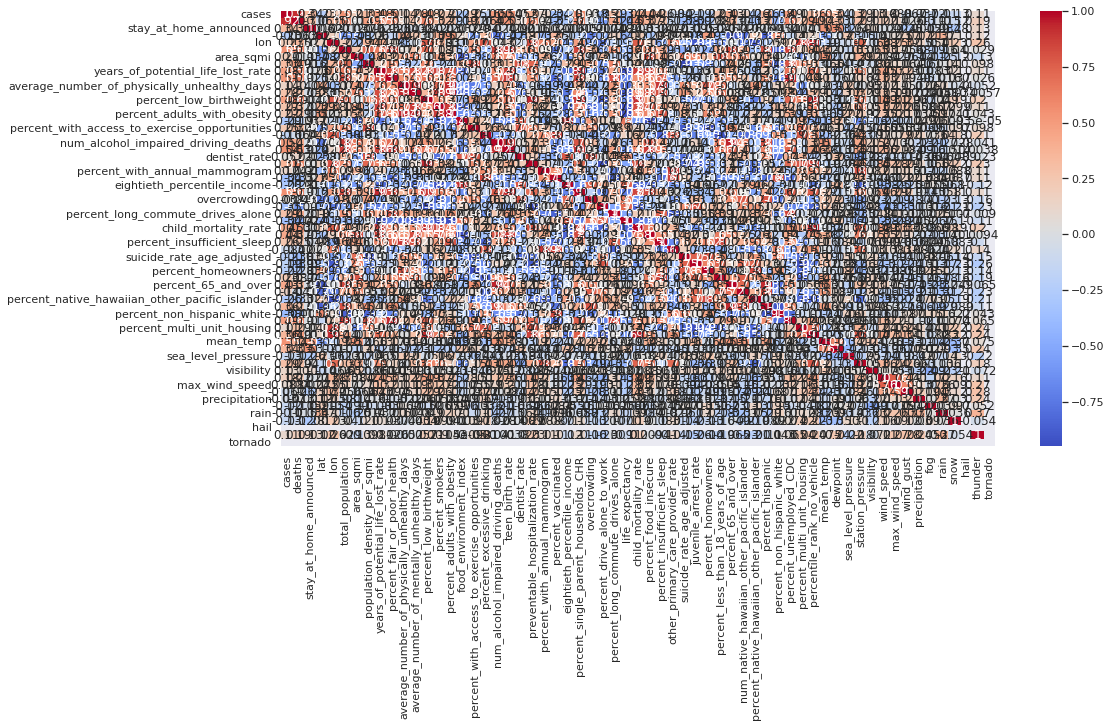

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_for_training.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07215688, 0.00820767, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07263334, 0.00820767, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07274225, 0.00820767, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [ ]:
trainXS = trainX
trainXB = trainX
trainYS = trainY
trainYB = trainY
testXS = testX
testXB = testX
testYS = testY
testYB = testY

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1252, 1, 61)
trainY Shape--  (1252,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (314, 1, 61)
testY Shape--  (314,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.         0.         0.         1.         0.         0.05133591
  0.1541227  0.         0.41800007 0.46859836 1.         0.84444745
  0.         0.81772068 1.         0.58333333 0.         0.07489903
  0.         0.23040962 0.12589113 0.         0.         0.2
  0.5099342  0.00589686 0.13919546 0.73674349 0.8006993  0.25992198
  0.3100275  0.24444444 1.         0.         0.906174   0.84033292
  1.         0.64808394 0.         0.42487212 1.         0.1449222
  0.73267244 0.33962264 0.         0.076912   0.41721235 0.60788863
  0.23608018 0.0010002  0.98888889 0.43636364 0.46488294 0.28629857
  0.         0.         1.         0.         0.         0.
  0.        ]]
trainY[0]--  0.0


In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(1024,return_sequences=True,input_shape=(1,61)))
    grid_model.add(LSTM(1024))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [28,32],
              'epochs' : [50,100],
              'optimizer' : ['adam'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
23/23 [==============================] - 9s 46ms/step - loss: 0.0328 - val_loss: 0.1647
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0159 - val_loss: 0.0399
Epoch 3/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0101 - val_loss: 0.0322
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0231
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 0.0151
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0159
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0186
Epoch 8/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0164
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0297
Epoch 10/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0150
Epoch 11/

In [ ]:
grid_search.best_params_

{'batch_size': 28, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
prediction=my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.06572805]
 [0.06348412]
 [0.062583  ]
 [0.06290317]
 [0.06416384]
 [0.06351468]
 [0.05901435]
 [0.05366376]
 [0.0512128 ]
 [0.0536546 ]
 [0.0525778 ]
 [0.05354683]
 [0.05727054]
 [0.05658535]
 [0.05845167]
 [0.05586733]
 [0.05860546]
 [0.05997675]
 [0.05459218]
 [0.05787001]
 [0.05243994]
 [0.0546367 ]
 [0.05269839]
 [0.05118304]
 [0.05933334]
 [0.06374672]
 [0.06070678]
 [0.05829579]
 [0.0591237 ]
 [0.06008462]
 [0.06041181]
 [0.06099986]
 [0.07221508]
 [0.0634184 ]
 [0.06264041]
 [0.05857059]
 [0.05586668]
 [0.05713579]
 [0.05964477]
 [0.06586745]
 [0.05793601]
 [0.06308535]
 [0.06173204]
 [0.06513935]
 [0.06804   ]
 [0.06312026]
 [0.06380659]
 [0.06721034]
 [0.07054551]
 [0.07204802]
 [0.06544048]
 [0.06933808]
 [0.07117264]
 [0.07547121]
 [0.07187775]
 [0.07629175]
 [0.07226947]
 [0.07743271]
 [0.07444519]
 [0.07898106]
 [0.08099154]
 [0.08053485]
 [0.08220872]
 [0.80886585]
 [0.8200168 ]
 [0.8668287 ]
 [0.86758405]
 [0.877558  ]
 [0.85059357]
 [0.88135874]
 [0.9078

In [ ]:
prediction_copies_array = np.repeat(prediction,61, axis=-1)
prediction_copies_array

array([[0.06572805, 0.06572805, 0.06572805, ..., 0.06572805, 0.06572805,
        0.06572805],
       [0.06348412, 0.06348412, 0.06348412, ..., 0.06348412, 0.06348412,
        0.06348412],
       [0.062583  , 0.062583  , 0.062583  , ..., 0.062583  , 0.062583  ,
        0.062583  ],
       ...,
       [0.10050261, 0.10050261, 0.10050261, ..., 0.10050261, 0.10050261,
        0.10050261],
       [0.09972546, 0.09972546, 0.09972546, ..., 0.09972546, 0.09972546,
        0.09972546],
       [0.10536805, 0.10536805, 0.10536805, ..., 0.10536805, 0.10536805,
        0.10536805]], dtype=float32)

In [ ]:
prediction_copies_array.shape

(314, 61)

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),61)))[:,0]

In [ ]:
original_copies_array = np.repeat(testY,61, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),61)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [  9657.503    9327.833    9195.444    9242.482    9427.695    9332.323
   8671.151    7885.0645   7524.979    7883.719    7725.52     7867.886
   8414.958    8314.293    8588.485    8208.805    8611.08     8812.543
   8021.465    8503.03     7705.2656   8028.006    7743.237    7520.607
   8718.017    9366.414    8919.797    8565.585    8687.217    8828.392
   8876.462    8962.855   10610.551    9318.179    9203.88     8605.957
   8208.709    8395.162    8763.771    9677.983    8512.727    9269.247
   9070.424    9571.013    9997.165    9274.377    9375.21     9875.274
  10365.265   10586.008    9615.254   10187.874   10457.4     11088.929
  10560.991   11209.4795  10618.542   11377.1045  10938.189   11604.581
  11899.953   11832.857   12078.776  118836.336  120474.586  127352.
 127462.98   128928.305  124966.805  129486.7    133377.03   131450.38
 132735.98   129243.31   132295.69   132729.     129618.48   130981.51
 132909.1    134825.36   134028.92   133356.83   12903

In [ ]:
#pred = np.exp(pred)
#print(pred)

In [ ]:
#original = np.exp(original)
#print(original)

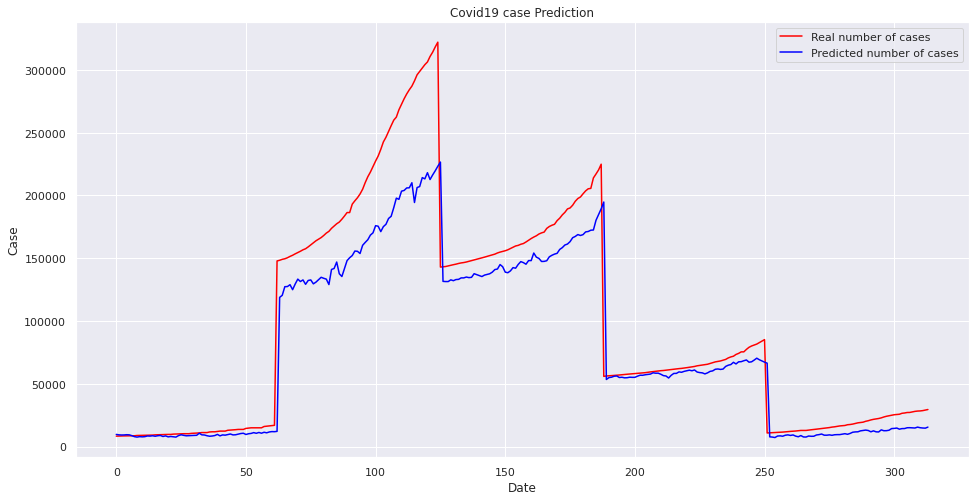

In [ ]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(original, pred)))
print("MAE:",metrics.mean_absolute_error(original, pred))
print("MSE:",metrics.mean_squared_error(original, pred))
print("MAPE: ",MAPE(original,pred))

RMSE : 3.045e+04
MAE: 18585.519147156152
MSE: 927174201.0759286
MAPE:  22.59946264520925


In [ ]:
forecast_errors = [original[i]-pred[i] for i in range(len(original))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(original)
print('Bias: %f' % bias)

Forecast Errors: [-1374.5029296875, -955.8330078125, -760.4443359375, -760.482421875, -902.6953125, -737.3232421875, -76.1513671875, 709.935546875, 1288.02099609375, 985.28076171875, 1225.47998046875, 1179.11376953125, 710.0419921875, 810.70703125, 536.5146484375, 1113.1953125, 790.919921875, 665.45703125, 1540.53515625, 1155.9697265624982, 1953.7343749999982, 1630.9941406249982, 2147.763183593748, 2427.39306640625, 1306.9833984375, 759.5859374999982, 1299.203125, 1653.4150390625, 1531.783203125, 1676.6083984375, 1710.5380859375018, 1760.14453125, 266.44921875, 1810.8212890625, 1925.1201171875, 2523.04296875, 3400.291015625, 3351.837890625, 2983.228515625, 2335.0166015625, 3788.2734375, 3031.7529296875, 3230.576171875, 3393.9873046875, 3113.8349609375, 3994.623046875, 4052.7900390625, 3763.725585937498, 3273.735351562498, 3052.992187499998, 4827.74609375, 4527.1259765625, 4467.599609374998, 3836.071289062498, 4364.008789062498, 3715.520507812498, 4306.458007812498, 4595.895507812502, 5

Stacked LSTM

In [ ]:
print("trainXS Shape-- ",trainXS.shape)
print("trainYS Shape-- ",trainYS.shape)

trainXS Shape--  (1252, 1, 61)
trainYS Shape--  (1252,)


In [ ]:
print("testXS Shape-- ",testXS.shape)
print("testYS Shape-- ",testYS.shape)

testXS Shape--  (314, 1, 61)
testYS Shape--  (314,)


In [ ]:
print("trainXS[0]-- \n",trainXS[0])
print("trainYS[0]-- ",trainYS[0])

trainXS[0]-- 
 [[0.         0.         0.         1.         0.         0.05133591
  0.1541227  0.         0.41800007 0.46859836 1.         0.84444745
  0.         0.81772068 1.         0.58333333 0.         0.07489903
  0.         0.23040962 0.12589113 0.         0.         0.2
  0.5099342  0.00589686 0.13919546 0.73674349 0.8006993  0.25992198
  0.3100275  0.24444444 1.         0.         0.906174   0.84033292
  1.         0.64808394 0.         0.42487212 1.         0.1449222
  0.73267244 0.33962264 0.         0.076912   0.41721235 0.60788863
  0.23608018 0.0010002  0.98888889 0.43636364 0.46488294 0.28629857
  0.         0.         1.         0.         0.         0.
  0.        ]]
trainYS[0]--  0.0


In [ ]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,61)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


In [ ]:
grid_search_S = grid_search.fit(trainXS,trainYS)

Epoch 1/50
23/23 [==============================] - 4s 63ms/step - loss: 0.0296 - val_loss: 0.0817
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0126 - val_loss: 0.0295
Epoch 3/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0046 - val_loss: 0.0228
Epoch 4/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0180
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 6/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 0.0157
Epoch 8/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0146
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0045 - val_loss: 0.0166
Epoch 10/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0150
Epoch 11/

In [ ]:
grid_search_S.best_params_

{'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
my_s_model=grid_search_S.best_estimator_.model

In [ ]:
predictionS =my_s_model.predict(testXS)
print("prediction\n", predictionS)
print("\nPrediction Shape-",predictionS.shape)

prediction
 [[0.0567202 ]
 [0.05451554]
 [0.05367395]
 [0.05360169]
 [0.05499633]
 [0.0545103 ]
 [0.05465289]
 [0.04010225]
 [0.04140579]
 [0.04506137]
 [0.04367969]
 [0.04659576]
 [0.05274247]
 [0.04967736]
 [0.04879043]
 [0.04861481]
 [0.05011224]
 [0.05566908]
 [0.04777582]
 [0.04853842]
 [0.0444564 ]
 [0.04154254]
 [0.04836394]
 [0.04499196]
 [0.05605434]
 [0.0608632 ]
 [0.05566113]
 [0.04604226]
 [0.0502943 ]
 [0.05123378]
 [0.05130961]
 [0.05442536]
 [0.06479373]
 [0.05709409]
 [0.05896676]
 [0.04656608]
 [0.0516043 ]
 [0.05346207]
 [0.05323636]
 [0.05745695]
 [0.05220698]
 [0.05272604]
 [0.0557311 ]
 [0.05934682]
 [0.06298147]
 [0.04820568]
 [0.0532226 ]
 [0.061543  ]
 [0.06578832]
 [0.06941343]
 [0.06097201]
 [0.06454211]
 [0.06521839]
 [0.07114448]
 [0.06831654]
 [0.07134732]
 [0.06701156]
 [0.0691241 ]
 [0.07007043]
 [0.0705146 ]
 [0.07444596]
 [0.07979703]
 [0.0820379 ]
 [0.9133525 ]
 [0.9239351 ]
 [0.9718301 ]
 [0.96825856]
 [0.9797931 ]
 [0.951747  ]
 [0.98458856]
 [1.0131

In [ ]:
prediction_copies_array_S = np.repeat(predictionS,61, axis=-1)
prediction_copies_array_S

array([[0.0567202 , 0.0567202 , 0.0567202 , ..., 0.0567202 , 0.0567202 ,
        0.0567202 ],
       [0.05451554, 0.05451554, 0.05451554, ..., 0.05451554, 0.05451554,
        0.05451554],
       [0.05367395, 0.05367395, 0.05367395, ..., 0.05367395, 0.05367395,
        0.05367395],
       ...,
       [0.10068173, 0.10068173, 0.10068173, ..., 0.10068173, 0.10068173,
        0.10068173],
       [0.10077897, 0.10077897, 0.10077897, ..., 0.10077897, 0.10077897,
        0.10077897],
       [0.10598011, 0.10598011, 0.10598011, ..., 0.10598011, 0.10598011,
        0.10598011]], dtype=float32)

In [ ]:
prediction_copies_array_S.shape

(314, 61)

In [ ]:
predS=scaler.inverse_transform(np.reshape(prediction_copies_array_S,(len(predictionS),61)))[:,0]

In [ ]:
original_copies_array_S = np.repeat(testYS,61, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS),61)))[:,0]

In [ ]:
print("Pred Values-- " ,predS)
print("\nOriginal Values-- " ,originalS)

Pred Values--  [  8334.1045   8010.205    7886.5615   7875.946    8080.8413   8009.4355
   8030.3843   5892.662    6084.173    6621.2363   6418.245    6846.6626
   7749.712    7299.3984   7169.095    7143.293    7363.2896   8179.679
   7020.0327   7132.07     6532.357    6104.2646   7106.4365   6611.039
   8236.279    8942.777    8178.511    6765.3447   7390.0376   7528.0615
   7539.202    7996.956    9520.236    8389.035    8664.16     6842.3027
   7582.4976   7855.4326   7822.2725   8442.345    7671.0405   7747.2983
   8188.7905   8719.997    9253.986    7083.1855   7820.252    9042.651
   9666.357   10198.944    8958.763    9483.27     9582.625   10453.264
  10037.794   10483.063    9846.07    10156.4375  10295.468   10360.724
  10938.303   11724.461   12053.681  134187.1    135741.84   142778.39
 142253.67   143948.28   139827.86   144652.81   148846.16   146797.77
 149448.2    144212.69   147726.47   149374.6    144700.27   147690.83
 149759.     152298.3    151310.1    150342.92 

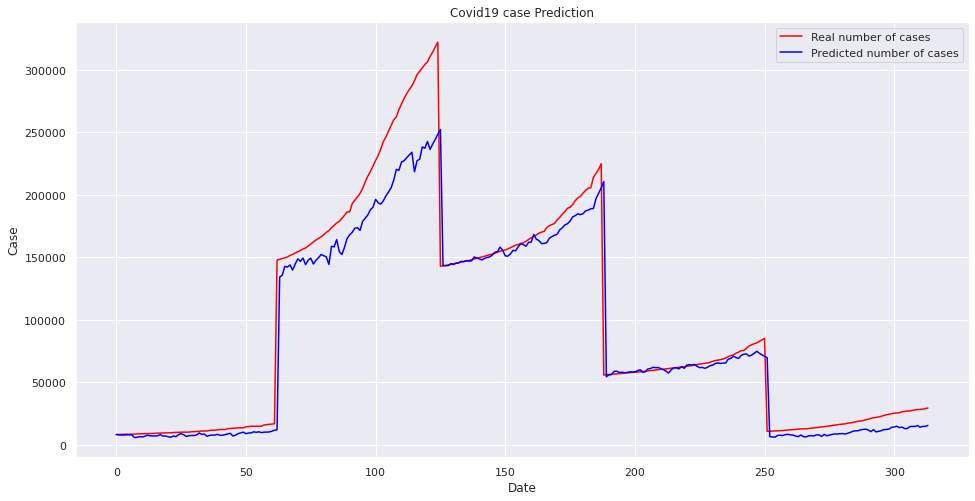

In [ ]:
plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalS, predS)))
print("MAE:",metrics.mean_absolute_error(originalS, predS))
print("MSE:",metrics.mean_squared_error(originalS, predS))
print("MAPE: ",MAPE(originalS,predS))

RMSE : 2.302e+04
MAE: 12122.441250746417
MSE: 529805720.95844185
MAPE:  21.294293247639263


In [ ]:
forecast_errorS = [originalS[i]-predS[i] for i in range(len(originalS))]
print('Forecast Errors: %s' % forecast_errorS)
biaS = sum(forecast_errorS) * 1.0/len(originalS)
print('Bias: %f' % biaS)

Forecast Errors: [-51.1044921875, 361.794921875, 548.4384765625, 606.05419921875, 444.15869140625, 585.564453125, 564.61572265625, 2702.337890625, 2728.8271484375, 2247.763671875, 2532.7548828125, 2200.33740234375, 1375.2880859375, 1825.6015625, 1955.90478515625, 2178.70703125, 2038.71044921875, 1298.32080078125, 2541.96728515625, 2526.930175781248, 3126.643066406248, 3554.735351562498, 2784.563476562498, 3336.9609375, 1788.720703125, 1183.2226562499982, 2040.48876953125, 3453.6552734375, 2828.96240234375, 2976.9384765625, 3047.797851562502, 2726.0439453125, 1356.763671875, 2739.96484375, 2464.83984375, 4286.697265625, 4026.50244140625, 3891.5673828125, 3924.7275390625, 3570.6552734375, 4629.95947265625, 4553.70166015625, 4112.20947265625, 4245.0029296875, 3857.013671875, 6185.814453125, 5607.748046875, 4596.348632812498, 3972.642578124998, 3440.055664062498, 5484.2373046875, 5231.73046875, 5342.374999999998, 4471.736328124998, 4887.206054687498, 4441.936523437498, 5078.929687499998, 5

Bi-LSTM

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [ ]:
print("trainXB Shape-- ",trainXB.shape)
print("trainYB Shape-- ",trainYB.shape)

trainXB Shape--  (1252, 1, 61)
trainYB Shape--  (1252,)


In [ ]:
print("testXB Shape-- ",testXB.shape)
print("testYB Shape-- ",testYB.shape)

testXB Shape--  (314, 1, 61)
testYB Shape--  (314,)


In [ ]:
print("trainXB[0]-- \n",trainXB[0])
print("trainYB[0]-- ",trainYB[0])

trainXB[0]-- 
 [[0.         0.         0.         1.         0.         0.05133591
  0.1541227  0.         0.41800007 0.46859836 1.         0.84444745
  0.         0.81772068 1.         0.58333333 0.         0.07489903
  0.         0.23040962 0.12589113 0.         0.         0.2
  0.5099342  0.00589686 0.13919546 0.73674349 0.8006993  0.25992198
  0.3100275  0.24444444 1.         0.         0.906174   0.84033292
  1.         0.64808394 0.         0.42487212 1.         0.1449222
  0.73267244 0.33962264 0.         0.076912   0.41721235 0.60788863
  0.23608018 0.0010002  0.98888889 0.43636364 0.46488294 0.28629857
  0.         0.         1.         0.         0.         0.
  0.        ]]
trainYB[0]--  0.0


In [ ]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,61)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


In [ ]:
grid_search_B = grid_search.fit(trainXB,trainYB)

Epoch 1/50
23/23 [==============================] - 4s 45ms/step - loss: 0.0344 - val_loss: 0.2104
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0144 - val_loss: 0.0349
Epoch 3/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0036 - val_loss: 0.0474
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.0394
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0202
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0033 - val_loss: 0.0262
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 0.0164
Epoch 8/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0158
Epoch 9/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0261
Epoch 10/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0200
Epoch 11/

In [ ]:
grid_search_B.best_params_

{'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
my_B_model=grid_search_B.best_estimator_.model

In [ ]:
predictionB =my_B_model.predict(testXB)
print("prediction\n", predictionB)
print("\nPrediction Shape-",predictionB.shape)

prediction
 [[0.06564331]
 [0.06386917]
 [0.06370553]
 [0.06338155]
 [0.06370442]
 [0.06304847]
 [0.06502258]
 [0.05598255]
 [0.05638068]
 [0.05851065]
 [0.05802762]
 [0.05992593]
 [0.06117369]
 [0.06472641]
 [0.06359769]
 [0.06235325]
 [0.0639684 ]
 [0.06313924]
 [0.0596246 ]
 [0.05474163]
 [0.05695695]
 [0.05483106]
 [0.05470822]
 [0.05595402]
 [0.06351761]
 [0.06933098]
 [0.0684051 ]
 [0.06033345]
 [0.05701979]
 [0.05750347]
 [0.05634437]
 [0.06776125]
 [0.08240999]
 [0.07401306]
 [0.06592193]
 [0.05587256]
 [0.05519821]
 [0.05680149]
 [0.06483839]
 [0.06231944]
 [0.06251772]
 [0.06634066]
 [0.06731693]
 [0.07046682]
 [0.07473757]
 [0.05858698]
 [0.06660363]
 [0.07497489]
 [0.08069915]
 [0.07864647]
 [0.06976838]
 [0.07481817]
 [0.07975934]
 [0.08300436]
 [0.07997506]
 [0.08690117]
 [0.0803214 ]
 [0.07504464]
 [0.08262251]
 [0.07837692]
 [0.07979611]
 [0.08411767]
 [0.08688479]
 [0.8713103 ]
 [0.8863481 ]
 [0.91800874]
 [0.92215484]
 [0.93051517]
 [0.9046919 ]
 [0.93890107]
 [0.9635

In [ ]:
prediction_copies_array_B = np.repeat(predictionB,61, axis=-1)
prediction_copies_array_B

array([[0.06564331, 0.06564331, 0.06564331, ..., 0.06564331, 0.06564331,
        0.06564331],
       [0.06386917, 0.06386917, 0.06386917, ..., 0.06386917, 0.06386917,
        0.06386917],
       [0.06370553, 0.06370553, 0.06370553, ..., 0.06370553, 0.06370553,
        0.06370553],
       ...,
       [0.10896756, 0.10896756, 0.10896756, ..., 0.10896756, 0.10896756,
        0.10896756],
       [0.10804479, 0.10804479, 0.10804479, ..., 0.10804479, 0.10804479,
        0.10804479],
       [0.11493052, 0.11493052, 0.11493052, ..., 0.11493052, 0.11493052,
        0.11493052]], dtype=float32)

In [ ]:
prediction_copies_array_B.shape

(314, 61)

In [ ]:
predB=scaler.inverse_transform(np.reshape(prediction_copies_array_B,(len(predictionB),61)))[:,0]

In [ ]:
original_copies_array_B = np.repeat(testYB,61, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB),61)))[:,0]

In [ ]:
print("Pred Values-- " ,predB)
print("\nOriginal Values-- " ,originalB)

Pred Values--  [  9645.053    9384.403    9360.362    9312.765    9360.198    9263.829
   9553.857    8225.731    8284.225    8597.15     8526.186    8805.078
   8988.395    9510.346    9344.52     9161.69     9398.981    9277.166
   8760.808    8043.421    8368.887    8056.5596   8038.5127   8221.54
   9332.753   10186.831   10050.804    8864.948    8378.119    8449.18
   8278.889    9956.212   12108.346   10874.703    9685.986    8209.573
   8110.501    8346.048    9526.798    9156.722    9185.854    9747.505
   9890.935   10353.703   10981.1455   8608.364    9786.14    11016.011
  11856.996   11555.426   10251.093   10992.987   11718.923   12195.668
  11750.616   12768.172   11801.499   11026.259   12139.568   11515.824
  11724.325   12359.231   12765.767  128010.42   130219.72   134871.17
 135480.3    136708.56   132914.7    137940.6    141565.16   139550.28
 142708.19   137734.97   140555.19   142711.47   137935.9    141679.16
 143102.36   144117.1    142488.14   142129.92   13812

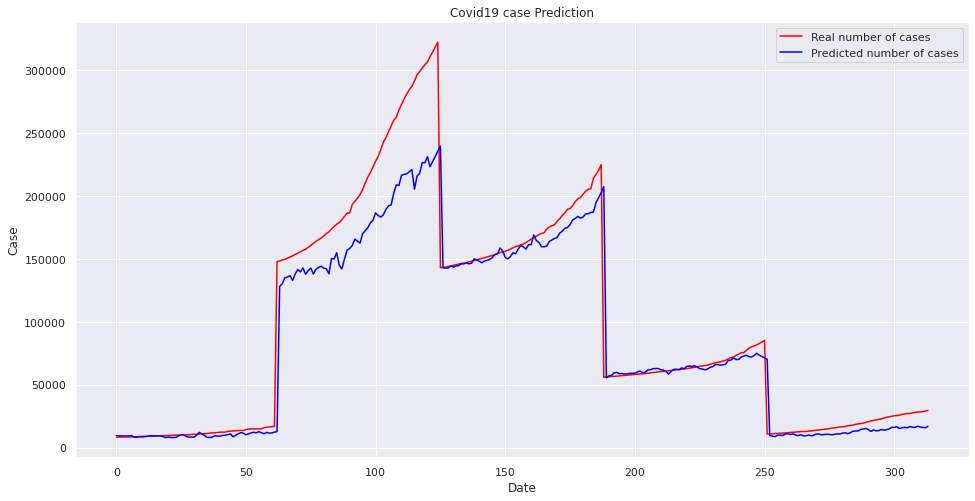

In [ ]:
plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [ ]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalB, predB)))
print("MAE:",metrics.mean_absolute_error(originalB, predB))
print("MSE:",metrics.mean_squared_error(originalB, predB))
print("MAPE: ",MAPE(originalB,predB))

RMSE : 2.591e+04
MAE: 13406.971580165207
MSE: 671123386.5102706
MAPE:  17.214266412036228


In [ ]:
forecast_errorB = [originalB[i]-predB[i] for i in range(len(originalB))]
print('Forecast Errors: %s' % forecast_errorB)
biasB = sum(forecast_errorB) * 1.0/len(originalB)
print('Bias: %f' % biasB)

Forecast Errors: [-1362.052734375, -1012.4033203125, -925.3623046875, -830.7646484375, -835.1982421875, -668.8291015625, -958.857421875, 369.2685546875, 528.775390625, 271.849609375, 424.814453125, 241.921875, 136.60546875, -385.345703125, -219.51953125, 160.3095703125, 3.0185546875, 200.833984375, 801.1923828125, 1615.5791015624982, 1290.1132812499982, 1602.4404296874982, 1852.4873046874982, 1726.4599609375, 692.2470703125, -60.83105468750182, 168.1962890625, 1354.0517578125, 1840.880859375, 2055.8203125, 2308.111328125002, 766.7880859375, -1231.345703125, 254.296875, 1443.013671875, 2919.4267578125, 3498.4990234375, 3400.9521484375, 2220.2021484375, 2856.2783203125, 3115.146484375, 2553.4951171875, 2410.0654296875, 2611.296875, 2129.8544921875, 4660.6357421875, 3641.8603515625, 2622.989257812498, 1782.0039062499982, 2083.574218749998, 4191.9072265625, 3722.0126953125, 3206.077148437498, 2729.332031249998, 3174.383789062498, 2156.828124999998, 3123.500976562498, 4946.741210937502, 409